<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/8_Logistic_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

Replace binary activation function in perceptron by the sigmoid activation
function. 

$$ \sigma(z)=\frac{1}{1+\exp(-z)}\in(0,1)$$
One important property is $\sigma(-z) = 1- \sigma(z)$.

Given an input $\mathbf{x}$, the logistic model outputs $\sigma(\mathbf{w}^\top\mathbf{x})$ can be interpreted as the probability that $\mathbf{x}$ belongs to Class 1.


$$ p(y=1| \mathbf{x;w})=\sigma(\mathbf{w}^\top \mathbf{x}),\ \  p(y=0| \mathbf{x;w}) = 1-\sigma(\mathbf{w}^\top \mathbf{x})$$

Prediction: the probability $\phi(\mathbf{w}^\top\mathbf{x})$,
 
 \begin{equation}
 \mathbf{x} \in \begin{cases} \text{ class 1} & \text{if } \sigma(\mathbf{w}^\top\mathbf{x})>1/2 \\
 \text{ class 0} & \text{if }\sigma(\mathbf{w}^\top\mathbf{x})<1/2 \end{cases}
 \end{equation}

In [1]:
%pylab inline 
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


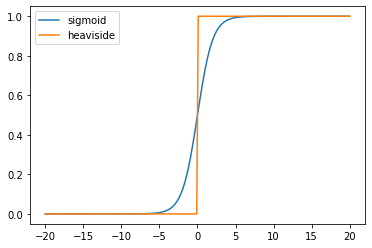

In [2]:
z = linspace(-20,20, 200)
sigma = 1/(1+exp(-z))
h = heaviside(z,0.5)
fig, ax = plt.subplots()
ax.plot(z,sigma,label='sigmoid')
ax.plot(z, h,label='heaviside')
leg = ax.legend();

## Negative log likelihood 
The likelihood $L(\mathbf{w})= P(\{y^{(i)}\}_{i=1}^N | \{\mathbf{x}^{(i)}\}_{i=1}^N, \mathbf{w})=\Pi_{i=1}^N P(y^{(i)}|\mathbf{x}^{(i)} ,\mathbf{w} )$ because the dataset are sampled in i.i.d manner.


We estimate the parameters of a logistic regression model using
maximum likelihood estimation.So negative log likelihood  will be the loss function. For the training data $\{\mathbf{x}^{(i)},y^{(i)}\}_{i=1,\dots, N}$
\begin{align} \text{NLL}(\mathbf{w})&=- \log\Pi_{i=1}^N\{[\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})]^{y^{(i)}}[1-\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})]^{1-y^{(i)}}\}\\
&=-\sum_{i=1}^N[y^{(i)} \log\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}))]
\end{align} 

### Cross entropy loss

- For Bernoulli distributions $\mathbf{p}=(p, 1-p)$ and $\mathbf{q}=(q, 1-q)$, the cross entropy is
$$H(\mathbf{p},\mathbf{q}) =-p_1\log(q_1) - (1-p_1) \log(1-q_1) $$

- Cross entropy $H(\mathbf{p}, \mathbf{q})$ measures the dissimilarity between two probability
distributions.

- With fixed $\mathbf{p}$, $H(\mathbf{p}, \mathbf{q})$ is minimized at $\mathbf{q}=\mathbf{p}$. 


> Proof: Set $\frac{\partial H}{\partial q_1}=-\frac{p_1}{q_1}+\frac{1-p_1}{1-q_1}=0$, so $q_1=p_1$. Calculate $\frac{\partial^2 H}{\partial q_1^2}>0$ to show this is minimum. 



The gradient of the NLL is given by 
\begin{align}
\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})&=-\sum_{i=1}^N\Big(\frac{y^{(i)}}{\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})} (1-\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}))\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}) \mathbf{x}^{(i)} \\
&+ \frac{1-y^{(i)}}{1-\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})}(-1+\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}))\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}) \mathbf{x}^{(i)} \Big)\\
&=-\sum_{i=1}^N \Big(y^{(i)}(1-\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}))\mathbf{x}^{(i)} - (1-y^{(i)})\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})\mathbf{x}^{(i)}\Big) \\
&= \sum_{i=1}^N \underbrace{\left(\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})- y^{(i)}\right)\mathbf{x}^{(i)}}_{=\nabla L_i(\mathbf{w})} = (\mathbb{1}_N^\top \text{diag}(\mathbf{\sigma}- \mathbf{y})\mathbf{X})^\top
\end{align}

We can show the Hessian is positive definite, that implies the loss function is strongly convex. Intuitvely this means that the NLL has a bowl shape, with a unique lowest point. 

## Stochastic Gradient descent
Solve the following optimization problem. 
$$\hat{\mathbf{w}}=\text{arg}\min_{\mathbf{w}}\text{NLL}(\mathbf{w})$$

The simplest is to use stochastic gradient descent. If we use a minibatch of size 1, then we get the following simple update equation:

$$ \mathbf{w}_{t+1}=\mathbf{w}_t-\eta_t(\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})- y^{(i)})\mathbf{x}^{(i)}$$

### Mini-batches
In each iteration, randomly sample mini-batch $\mathcal{B}_t\subset \{1,\dots, N\}$ of fixed size $|\mathcal{B}_t|$.

Evaluate and sum up and average gradient of sample loss functions: 
$$ \mathbf{w}_{t+1}=\mathbf{w}_t-\frac{\eta_t}{|\mathcal{B}_t|} \sum_{i\in \mathcal{B}_t}(\sigma(\mathbf{w}^\top \mathbf{x}^{(i)})- y^{(i)})\mathbf{x}^{(i)}$$

Validity of SGD: the expectation is the true gradient, 
$$ \mathbb{E}\left[\frac{1}{|\mathcal{B}_t|}\sum_{i\in \mathcal{B}_t }\nabla L_i(\mathbf{w})  \right]=\frac{1}{n}\sum_{i=1}^n\nabla L_i(\mathbf{w})$$

In [3]:
# Make a prediction with weights
def predict(x, w):
	z = w.dot(x)

	return 1.0 / (1.0 + exp(-z))


[[ 1.          2.7810836   2.550537  ]
 [ 1.          1.46548937  2.36212508]
 [ 1.          3.39656169  4.40029353]
 [ 1.          1.38807019  1.85022032]
 [ 1.          3.06407232  3.00530597]
 [ 1.          7.62753121  2.75926224]
 [ 1.          5.33244125  2.08862677]
 [ 1.          6.92259672  1.77106367]
 [ 1.          8.67541865 -0.24206865]
 [ 1.          7.67375647  3.50856301]]


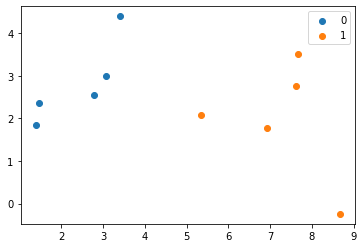

In [4]:
dataset = array([[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
leg = ax.legend();

X = hstack([ones((dataset.shape[0],1)), dataset[:,0:2] ])
y = dataset[:,2]
print(X)


In [7]:
# Estimate logistic regression coefficients using stochastic gradient descent

def train_weights(X, y, l_epoch_span, n_epoch, threshold=0.002):
  n, m    = X.shape
  weights = zeros(m) # Initial condition is always 0 vector. it is a bad idea! 
  # you should modify this code to make IC as an input. Then you can call this call function put the last weight as the new initial condition.
  for epoch in range(n_epoch):
    l_rate   = l_epoch_span[epoch]
    sum_error = 0;
    arr = np.arange(n)
    random.shuffle(arr)
    for i in arr:
      prediction = predict(X[i,:], weights)
      error      = prediction - y[i]
      sum_error  = error**2 + sum_error
      weights    = weights - l_rate * error * X[i,:]
    print('sum_error at ',epoch+1, 'epoch is ', sum_error)
    if sum_error<threshold:
      break


  return weights

In [10]:

n_epoch = 20
n_span = arange(n_epoch)
l_epoch_span = 1/((1+2 * n_span)**2) 
#print(l_rate_span)
weights = train_weights(X, y, l_epoch_span, n_epoch) #you should restart with the new IC. 
print(weights)


sum_error at  1 epoch is  3.249996506957067
sum_error at  2 epoch is  0.6048281197542147
sum_error at  3 epoch is  0.003553941604389714
sum_error at  4 epoch is  0.0028251034936972734
sum_error at  5 epoch is  0.002566132262302985
sum_error at  6 epoch is  0.0024224675257674346
sum_error at  7 epoch is  0.0023325669996998293
sum_error at  8 epoch is  0.002275576352254552
sum_error at  9 epoch is  0.0022365438445528857
sum_error at  10 epoch is  0.0022040384629051705
sum_error at  11 epoch is  0.002179455051510942
sum_error at  12 epoch is  0.0021603744187441423
sum_error at  13 epoch is  0.0021428295755913742
sum_error at  14 epoch is  0.0021291046536883653
sum_error at  15 epoch is  0.0021176876775021282
sum_error at  16 epoch is  0.002108565283311518
sum_error at  17 epoch is  0.00209936727344452
sum_error at  18 epoch is  0.0020919204329277095
sum_error at  19 epoch is  0.0020850284288494924
sum_error at  20 epoch is  0.0020798987547340757
[-1.38991577  2.34268752 -3.70367403]


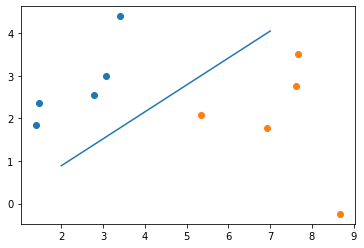

In [11]:

x_span = linspace(2,7,100)
y_span = -(weights[0] + weights[1] * x_span)/weights[2]
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
plot(x_span, y_span)

- Both perceptron and logistic model learn a linear decision boundary for
binary classification.

- Logistic model reflects the confidence levels of predictions, while
perceptron does not.

- Logistic regression permits smooth and convex minimization, which is
much easier to solve by standard approach like stochastic gradient descent

## Multiclass classification
Binary vs. Multiclass logistic regression
- binary logistic regression has a single output that can predict two classes.

- multiclass logistic regression has multiple outputs, each of which is used to predict a single class

For example, Handwritten digits recognition
- Input $\mathbf{x}\in \mathbb{R}^{28\times 28}$: gray intensity values of the pixels, from 0 (black) to 255(white).

- Label $\mathbf{y}\in \mathbb{R}^{10}$ one hot vector: true class of the digit. $y_j=1$ if $\mathbf{x}\in \text{class } j$. Can be viewed as a multinoulli probability distribution.



### Softmax activation
softmax activation function $\sigma: \mathbb{R}^K \rightarrow \mathbb{R}^K$ for $K-$class classification, defined as 
$$ \vec\sigma(\mathbf{z})=\left[\frac{\exp(z_1)}{\sum_{j=1}^K \exp(z_j)}, \dots, \frac{\exp(z_K)}{\sum_{j=1}^K \exp(z_j)}\right]^\top$$

- $\sum_{i=1}^K{\sigma_i}(\mathbf{z})=1$, it is a multinoulli probability distribution.

- if $z_j = \max\{z_1, \dots, z_K\}$, then $\sigma_j(\mathbf{z})=\max\{\sigma_1(\mathbf{z}), \dots, \sigma_K(\mathbf{z})\}$.

For image data, stack the input matrix into a column vector $\mathbf{x}$(add the intercept term). The model outputs the predicted probabilities for the $K$ classes:

$$\vec\sigma(\mathbf{W}\mathbf{x}) = \vec \sigma\left(\begin{bmatrix}\mathbf{w}_1 \mathbf{x}\\ \vdots  \\ \mathbf{w}_K \mathbf{x} \end{bmatrix}\right)=\begin{bmatrix} \frac{\exp(\mathbf{w}_1 \mathbf{x})}{\sum_{j=1}^K \exp(\mathbf{w}_j \mathbf{x})} \\ \vdots  \\ \frac{\exp(\mathbf{w}_K\mathbf{x})}{\sum_{j=1}^K \exp(\mathbf{w}_j \mathbf{x})} \end{bmatrix}\in(0,1)^K$$

where weight matrix $\mathbf{W}\in \mathbb{R}^{K\times d}$ and $\mathbf{w}_j$ is the $j$-th row of $\mathbf{W}$. 



---

Prediction: find the index $j$ associated with the max component of
$\vec\sigma(\mathbf{W}\mathbf{x})$ (highest predicted probability), i.e, 
$$j = \text{arg}\max_{1\le c \le K}\sigma_j(\mathbf{W}\mathbf{x}) $$
Then predict $\mathbf{x}\in \text{Class } j$.



In [ ]:
Image(url='https://github.com/yexf308/MAT592/blob/main/image/MNIST_LR.png?raw=true', width=1000)

In [ ]:
Image(url='https://github.com/yexf308/MAT592/blob/main/image/comparison_LR.png?raw=true', width=600)

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


[5 0 4 1 9 2 1 3 1]


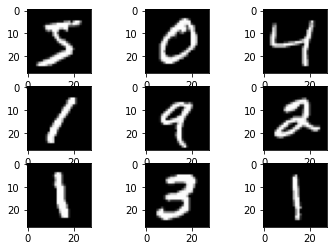

In [ ]:

fig, axs = plt.subplots(3, 3)
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
print(train_y[0:9])

### Negative log likelihood 
In handwritten digits recognition, 
$K=10, d=28^2+1=785, N=6\times 10^4$.

Define the probability matrix is
$$\Sigma(\mathbf{W}\mathbf{X})=\begin{bmatrix}\vec\sigma(\mathbf{W}\mathbf{x}^{(1)}) & \dots & \vec\sigma(\mathbf{W}\mathbf{x}^{(N)}) \end{bmatrix}\in\mathbb{R}^{K\times N}$$ 

The true label matrix is 
$$ \mathbf{Y} = \begin{bmatrix} \mathbf{y}^{(1)}& \dots &\mathbf{y}^{(N)}\end{bmatrix}\in \mathbb{R}^{K\times N} $$

The negative log likelihood (NLL) is 
\begin{align} \text{NLL}(\mathbf{W})&=-\log \Pi_{i=1}^N\Pi_{j=1}^K\Sigma(\mathbf{W}\mathbf{X})_{ji}^{\mathbf{Y}_{ji}} \\
&=-\sum_{i=1}^N\sum_{j=1}^K \mathbf{Y}_{ji} \log\Sigma(\mathbf{W}\mathbf{X})_{ji}= \sum_{i=1}^N H(\mathbf{Y}_{:,i}, \Sigma(\mathbf{W}\mathbf{X})_{:,i} )
\end{align}

The gradient of NLL is 

\begin{align}
\nabla_{\mathbf{W}}\text{NLL}(\mathbf{W})= \sum_{i=1}^N  \left(\Sigma(\mathbf{W}\mathbf{X})_{:,i} - \mathbf{Y}_{:,i}\right) \mathbf{X}_{:,i}^\top
\end{align}